In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


## mathplotlib

#### 1 - read company_sales_data.csv with pandas

#### 2 - make a plot with total_profit as x axis and month_number columns as y axis

## The text of the question was not the same as your request and I prioritized the text of the question.

In [6]:
df = pd.read_csv('exam/company_sales_data.csv')
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


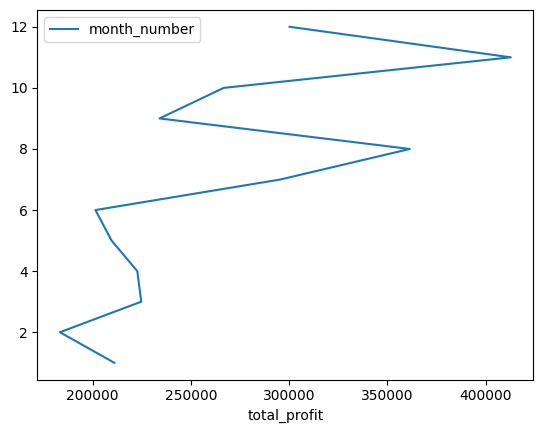

In [15]:
df.plot.line(x='total_profit',y='month_number')
plt.show()

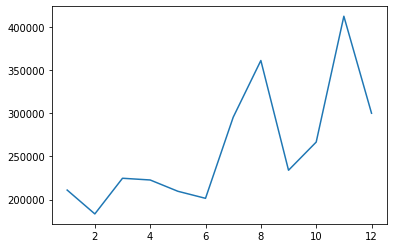

#### 3 - add "profit" as x label and "Month number" as y label  "company profit" as title  


#### 4 - each month_number should show in x axis and y axis should be [100000, 200000, 300000, 400000, 500000]

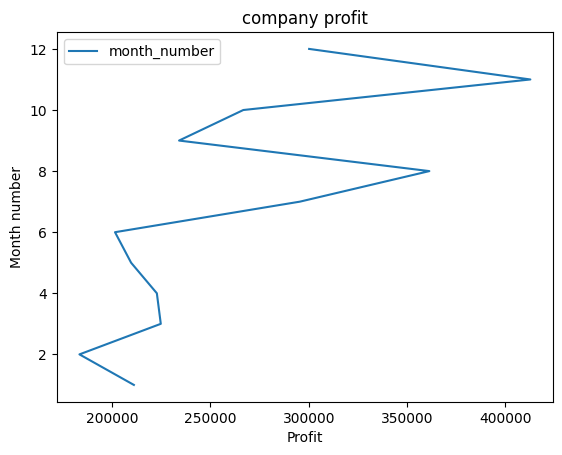

In [17]:
ax= df.plot.line(x='total_profit',y='month_number',title='company profit')

# Add labels and a title
ax.set_xlabel('Profit')
ax.set_ylabel('Month number')
# ax.set_title('Company Profit')

# Display the plot
plt.show()

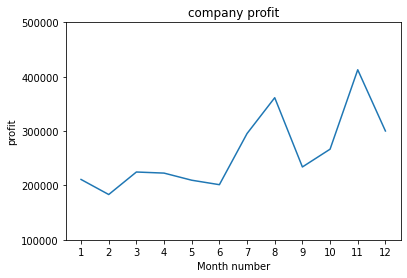

### style change

#### 5 - make your plot appearance like below(5 parameters should change)

Text(0, 0.5, 'Month number')

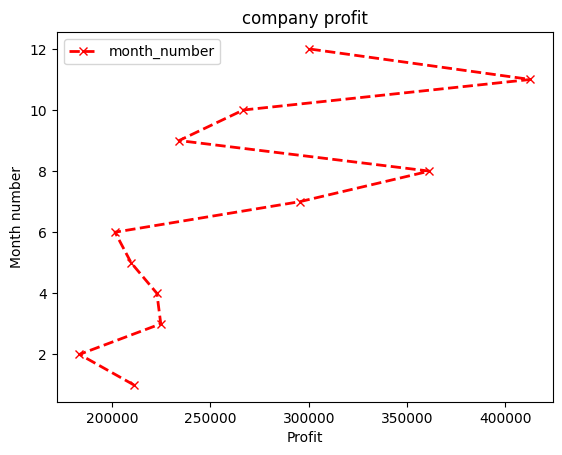

In [22]:
ax= df.plot.line(x='total_profit',y='month_number',title='company profit',
                 linewidth=2, linestyle='--', marker='x', markersize=6, color='red')
ax.set_xlabel('Profit')
ax.set_ylabel('Month number')

### bar plot 
#### 6 - create plot with toothpaste and shampoo column (if you can make background girdy)
#### use width and align='edge' to print bars beside each others not top of each others)

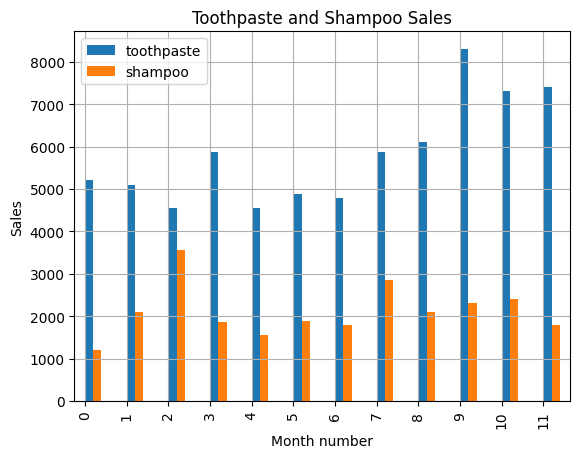

In [32]:
ax = df[['toothpaste', 'shampoo']].plot.bar( width=0.4, align='edge')

# Add a grid
ax.grid(True)

# Add labels and a title
ax.set_xlabel('Month number')
ax.set_ylabel('Sales')
ax.set_title('Toothpaste and Shampoo Sales')

# Display the plot
plt.show()

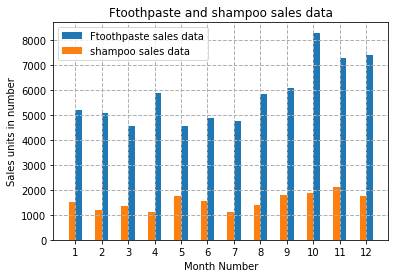

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


#### 7 - what kind of plot is the below picture?  
#### 8 - can you guess what we call 2 circle examples in interperting data?
#### Answer:

Box Plot
Outliers

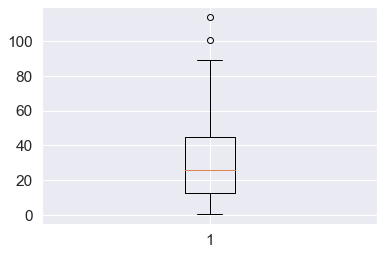


### use https://www.geeksforgeeks.org/matplotlib-practice-exercise-and-solutions/amp/ https://www.kaggle.com/code/leonlxy/matplotlib-tutorial-with-exercises-1 to learn mathplotlib deeply
    

### plz study hist plot pie plot

## seaborn 

In [ ]:
pip install seaborn

#### 9 - load titanic dataset with seaborn  and plot the count of survivors according to sex

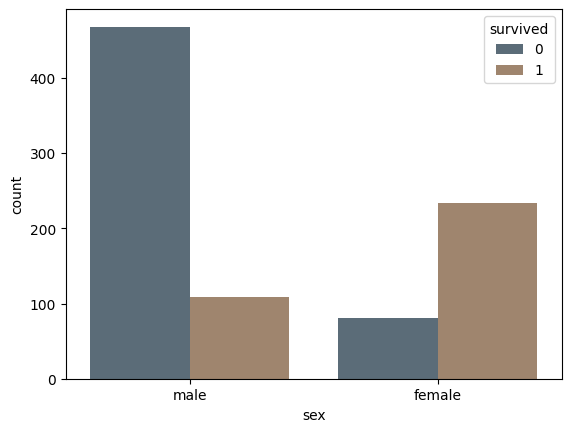

In [51]:
titanic_data = sns.load_dataset('titanic')

# Plot the count of survivors according to sex
sns.countplot(data=titanic_data, x='sex', hue='survived',saturation=0.2)

# Display the plot
plt.show()

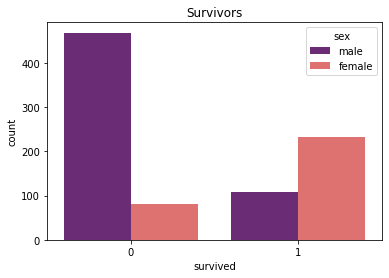

####  10 - plot the below plot from titanic dataset

In [58]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


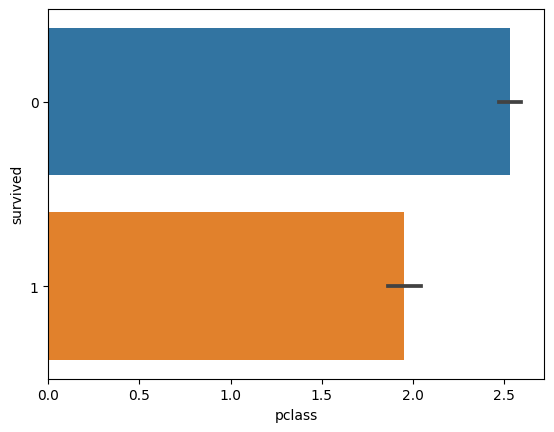

In [99]:
titanic_data = sns.load_dataset('titanic')
sns.barplot(titanic_data, y="survived",x = "pclass",orient='h') # y="sex",  )
plt.show()

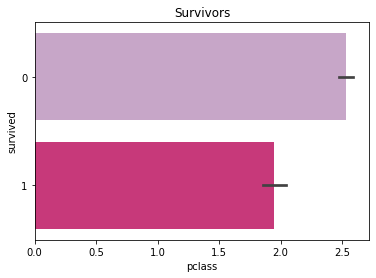

In [82]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 10 - 
use seaborn and make plot with dowjones dataet like below

## I cant find `dowjones` dataset 

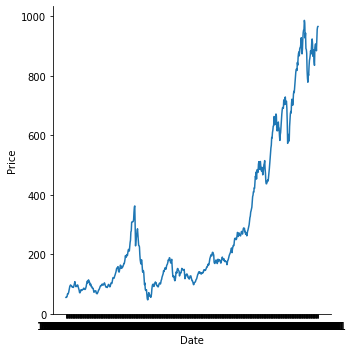

#### what function can we use instead of kind="line" in seaborn? and the output with pervois one are the same

relplot same as kind="line"
sns.relplot(x='fare',y='age',data=titanic_data, kind='line')

In [97]:
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


https://www.mygreatlearning.com/blog/seaborn-tutorial/

### linux
7 8 sudoer

1- برای پیدا کردن دقیق هر دستور و آپشن هاش در لینوکس چکاری میکنین 
> help or man
    
برای سرچ در صفحه راهنما چه کاری مینوان کرد

> Use: /<word>

برای ورود به یک پوشه از چه دستوری استفاده میشود 
> cd <path>/<folder>

2- چه دستوری مسیر حال حاضر شما را نشان میدهد 

> pwd

 دستوری بنویسید که تمامی فایل ها و دایرکتوری هایی که با 
در پوشه هوم وجود دارد را نمایش دهد

> ls /home or ls ~

4- آپشن های دستور زیر تحلیل کنید ls -lahtr
> -l: Displays detailed information about each file and directory, including size, ownership, creation time, and permissions.
> -a: Shows all files and directories, including those starting with a dot (hidden files and directories).
> -h: Displays file sizes in a human-readable format, such as kilobytes or megabytes.
> -t: Sorts the list by modification time, with the newest files or directories appearing first.
> -r: Reverses the order of the list, so the files or directories are displayed in reverse order.




-R رو هم توضیح دهید
> Recursively lists all files and directories within the specified directory and its subdirectories.



6- در تصویر زیر منظور از فلش ها چیست
> Soft links 
![Alt text](download-1.jpg)

1- help or man

cd 